positive R2, improvement of R2 from ANN. Second option is the best

In [ ]:
# 1. Packages Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
upload = files.upload() #upload all the files from Q1 Master Thesis fin

Saving [fin]_[size]_[monthly]_[vw].xlsx to [fin]_[size]_[monthly]_[vw].xlsx
Saving [fin]_[value]_[monthly]_[vw].xlsx to [fin]_[value]_[monthly]_[vw].xlsx
Saving market_returns.csv to market_returns.csv
Saving NOKIA_PX_LAST.xlsx to NOKIA_PX_LAST.xlsx
Saving NORDEA_FINLAND_PX_Last.xlsx to NORDEA_FINLAND_PX_Last.xlsx
Saving Risk Free Finland.xlsx to Risk Free Finland.xlsx
Saving Sampo_PX_Last.xlsx to Sampo_PX_Last.xlsx


In [ ]:
# 2.1 Fama-French Three Factors Model Data

# finmark, SAMPO, returns
SAMPO_monthly = pd.read_excel("Sampo_PX_Last.xlsx") # read data

SAMPO_monthly_array = SAMPO_monthly.to_numpy() # important in order to be able to process data
SAMPO_monthly_returns = SAMPO_monthly_array[:,2] 
SAMPO_returns = SAMPO_monthly_returns[29:353] # start 1994-01-31, end 2020-12-31

print(SAMPO_monthly[45:369])
SAMPO_returns.shape


         Dates  PX_LAST    Return  Unnamed: 3  SAMPO FH Equity
45  1994-01-31   2.9662  0.217702         NaN              NaN
46  1994-02-28   2.8999 -0.022352         NaN              NaN
47  1994-03-31   2.8419 -0.020001         NaN              NaN
48  1994-04-29   2.7756 -0.023329         NaN              NaN
49  1994-05-31   2.3614 -0.149229         NaN              NaN
..         ...      ...       ...         ...              ...
364 2020-08-31  33.7300  0.099772         NaN              NaN
365 2020-09-30  33.7900  0.001779         NaN              NaN
366 2020-10-30  32.4000 -0.041136         NaN              NaN
367 2020-11-30  36.2300  0.118210         NaN              NaN
368 2020-12-31  34.5700 -0.045818         NaN              NaN

[324 rows x 5 columns]


(324,)

In [ ]:
# 2.2 Fama-French Three Factors Model Data

# finland, Size, SMB
fin_size_monthly_vw = pd.read_excel('[fin]_[size]_[monthly]_[vw].xlsx') # read data
fin_size_monthly_vw_array = fin_size_monthly_vw.to_numpy() # important in order to be able to process data

fin_size_monthly_vw_returns = fin_size_monthly_vw_array[:,6] 
SMB_returns_fin = fin_size_monthly_vw_returns [83:407] # for t-1 for 12/1993-11/2020

print(fin_size_monthly_vw_array[83:407])
SMB_returns_fin.shape

[['fin' 'size' 'monthly' ... 2.0 Timestamp('1993-12-31 00:00:00')
  0.0218108033374346]
 ['fin' 'size' 'monthly' ... 4.0 Timestamp('1994-01-31 00:00:00')
  0.0828281899898303]
 ['fin' 'size' 'monthly' ... 4.0 Timestamp('1994-02-28 00:00:00')
  0.049104975309574]
 ...
 ['fin' 'size' 'monthly' ... 5.0 Timestamp('2020-09-30 00:00:00')
  -0.0339566477808054]
 ['fin' 'size' 'monthly' ... 5.0 Timestamp('2020-10-31 00:00:00')
  0.0311482325433216]
 ['fin' 'size' 'monthly' ... 5.0 Timestamp('2020-11-30 00:00:00')
  -0.0288760783125516]]


(324,)

In [ ]:
# 2.3 Fama-French Three Factors Model Data

# finland, Value, HML
fin_value_monthly_vw = pd.read_excel('[fin]_[value]_[monthly]_[vw].xlsx') # read data
fin_value_monthly_vw_array = fin_value_monthly_vw.to_numpy() # important in order to be able to process data

fin_value_monthly_vw_returns = fin_value_monthly_vw_array[:,6] 
HML_returns_fin = fin_value_monthly_vw_returns[72:396] # for t-1 for 12/1993 to 11/2020

print(fin_value_monthly_vw_array[72:396])
HML_returns_fin.shape

[['fin' 'value' 'monthly' ... 12.0 Timestamp('1993-12-31 00:00:00')
  0.024912779489709]
 ['fin' 'value' 'monthly' ... 12.0 Timestamp('1994-01-31 00:00:00')
  0.0023337466900296]
 ['fin' 'value' 'monthly' ... 12.0 Timestamp('1994-02-28 00:00:00')
  0.0165538004837318]
 ...
 ['fin' 'value' 'monthly' ... 18.0 Timestamp('2020-09-30 00:00:00')
  0.0059998029122782]
 ['fin' 'value' 'monthly' ... 18.0 Timestamp('2020-10-31 00:00:00')
  0.0102050878813744]
 ['fin' 'value' 'monthly' ... 18.0 Timestamp('2020-11-30 00:00:00')
  -0.0079182805118193]]


(324,)

In [ ]:
#upload Risk Free finland.xlsx
#upload = files.upload()

In [ ]:
# 2.4 Fama-French Three Factors Model Data

# finland, Historical risk-free rate
risk_free_fin = pd.read_excel('Risk Free Finland.xlsx') # read data
risk_free_fin_array = risk_free_fin.to_numpy() # important in order to be able to process data

#risk_free_fin_returns = risk_free_fin_array[:,6]/100 
#rf_fin = risk_free_fin_returns[3:327]
rf_fin_t1 = risk_free_fin_array[0:324,1]/100 # risk free t-1
rf_fin = risk_free_fin_array[1:325,1]/100

print(risk_free_fin[1:325])
#print(rf_fin)
rf_fin.shape

          Date  Annualized  Rate  \
1   1994-01-01    0.528316  5.09   
2   1994-02-01    0.501803  4.88   
3   1994-03-01    0.516897  5.00   
4   1994-04-01    0.519427  5.02   
5   1994-05-01    0.542390  5.20   
..         ...         ...   ...   
320 2020-08-01   -0.040811 -0.50   
321 2020-09-01   -0.040811 -0.50   
322 2020-10-01   -0.040811 -0.50   
323 2020-11-01   -0.040811 -0.50   
324 2020-12-01   -0.040811 -0.50   

     Data Source in SDW: https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=143.FM.D.U2.EUR.4F.KR.DFR.LEV  
1                                                  NaN                                                    
2                                                  NaN                                                    
3                                                  NaN                                                    
4                                                  NaN                                                    
5                               

(324,)

In [ ]:
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
#help(stats.linregress)

In [ ]:
import pandas_datareader as web
# If problem: "ModuleNotFoundError: No module named 'pandas_datareader'"
# Then open cmd --> Anaconda prompt --> activate environment --> paste the code below
# conda install -c anaconda pandas-datareader

### EXCESS RETURNS

In [ ]:
excess_returns_fin = SAMPO_returns - rf_fin
print(excess_returns_fin)

[-0.156273825619 0.839670806989 0.681613059036 -0.219504615457
 0.085535061579 -0.047097676152 0.124995088052 0.256201413103
 0.14104496630299998 0.031951221110999996 0.020403953174 0.319025705268
 -0.024794208818 0.028442324017 -0.021038741973 0.103261805018
 0.211648512041 -0.028949325286 -0.026433036505 -0.029761809505
 -0.155716208207 -0.19874047523 0.23428088919099999 -0.074396434547
 -0.09103222652700001 -0.01250508539 -0.045364876507 -0.068893755912
 -0.063901903602 -0.018627183857 -0.111102156692 0.18075864604800002
 -0.012695103539 0.051085716508 0.090144333458 -0.007145876158000001
 0.065531147866 -0.062880119202 0.07372446102199999 -0.08192019574199999
 0.177724021762 -0.032476837247 -0.0104872046 -0.041276796737
 -0.019160241869 0.09033760239000001 -0.006900259438 0.056518018929
 0.15879126115099998 -0.036484010579 0.056220378558 0.07053100463
 0.22547760822899998 0.07612787268 -0.037079015664 0.020583340214
 -0.045948187025999995 0.118767064509 0.095492855924 -0.0572058425

### MARKET RETURNS

In [ ]:
#upload market_returns.csv
#upload = files.upload()

In [ ]:
# Output variables, y

mkt_ret = pd.read_csv('market_returns.csv') 

mkt_ret_array = mkt_ret.to_numpy()

# creating market returns for finfin
# Note: we need to start from 12/1993 for finmark 
mkt_ret_fin = mkt_ret_array[8346:8670] # 324 datapoints for t-1
print(mkt_ret_fin)


[['FIN' '1993-12-31' 51 ... 0.1046050901 0.0679211494 0.1023420901]
 ['FIN' '1994-01-31' 50 ... 0.3186230716 0.2559801764 0.3161200716]
 ['FIN' '1994-02-28' 50 ... 0.0256447524 -0.006996156 0.0235247524]
 ...
 ['FIN' '2020-09-30' 151 ... -0.008278365 -0.020905457 -0.008354365]
 ['FIN' '2020-10-31' 152 ... -0.008237649 -0.050278555 -0.008310649]
 ['FIN' '2020-11-30' 152 ... 0.1475887608 0.1517259519 0.1475227608]]


In [ ]:
mkt_ret_fin_df = pd.DataFrame(mkt_ret_fin)
#creating the excess market returns
y_fin = mkt_ret_fin[:,7] - rf_fin_t1 # mkt_vw

# I print this out to see it as panel data
y_df = pd.DataFrame(y_fin) # This represents output or column: # mkt_vw
y_df.columns = ['mkt_vw']
R_m_fin = np.asarray(y_fin).astype(np.float32)

print(R_m_fin)
print(len(R_m_fin))

[ 0.06322312  0.25320002 -0.00989419 -0.08648607  0.05735624 -0.03961441
 -0.0366208   0.09531625  0.0841347  -0.00418645  0.06049827 -0.11220181
  0.01399103 -0.02540871 -0.00063404 -0.04795973  0.13771658  0.00633426
  0.06807297  0.08847326 -0.03696678  0.03393304 -0.13401182 -0.01538475
 -0.10798069 -0.02034834  0.03651673 -0.00954922  0.02466132  0.10527363
 -0.00637894  0.01408716  0.08521132 -0.017131    0.01279097  0.06604856
  0.02313326  0.0477006   0.01910747 -0.00816687  0.00153541  0.03989549
  0.03929939  0.06260365 -0.0699233   0.14461458 -0.06238451 -0.04235687
 -0.05039611  0.06048147  0.14602983  0.04397039  0.1519581  -0.00250214
  0.04626104  0.03869337 -0.17950317  0.0061064   0.08630048  0.06185991
  0.1460629   0.07336313 -0.05775727  0.10938675  0.02083695 -0.05173756
  0.13051051  0.01871461 -0.02603118  0.04865162  0.16274445  0.19787142
  0.28886744  0.00059864  0.07449517  0.0210751   0.012229   -0.09588769
 -0.00974118 -0.12086966 -0.03008242 -0.08910719 -0

### REGRESSION

In [ ]:
# df = pd.DataFrame(market_returns_fin,HML_returns_fin,SMB_returns_fin)
# print(df)
X1 = R_m_fin
X2 = HML_returns_fin
X3 = SMB_returns_fin

# regressors - that which regresses, or causes regression
X = R_m_fin
X_df = pd.DataFrame(X) # This represents output or column: # R_m_fin
X_df.columns = ['X1 (R_m_fin)']
X_df.insert(1, 'X2 (HML_returns_fin)', HML_returns_fin, True)
X_df.insert(1, 'X3 (SMB_returns_fin)', SMB_returns_fin, True)
print(X_df)

# regressand - the dependent variable in a regression
Y = excess_returns_fin



     X1 (R_m_fin) X3 (SMB_returns_fin) X2 (HML_returns_fin)
0        0.063223             0.021811             0.024913
1        0.253200             0.082828             0.002334
2       -0.009894             0.049105             0.016554
3       -0.086486            -0.021842            -0.065386
4        0.057356            -0.057845            -0.008193
..            ...                  ...                  ...
319      0.095970            -0.016948            -0.035365
320      0.080543            -0.017123            -0.009147
321     -0.020421            -0.033957                0.006
322     -0.049797             0.031148             0.010205
323      0.152200            -0.028876            -0.007918

[324 rows x 3 columns]


In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
# ACTIVATE YOUR CONDA ENVIRONEMENT AND TYPE THIS:
# conda install -c conda-forge statsmodels

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_df = X_df.to_numpy() #dataframe to num
X_df.shape

(324, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size = 0.3, random_state = 100)

In [ ]:
#mlr = LinearRegression()  
#mlr.fit(X_df, Y)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:",mlr.coef_)

Intercept:  0.020437888206847606
Coefficients: [-0.02987778  0.05115877 -0.0268972 ]


In [ ]:
# rf_fin
# SAMPO_returns
# HML_returns_fin
# SMB_returns_fin

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

# compute with formulas from the theory
yhat = mlr.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)   
SS_Total = sum((y_test-np.mean(y_test))**2)     

# r_squared
r_squared_FF3 = 1 - (float(SS_Residual))/SS_Total
print("R2 =", r_squared_FF3)

# adjusted_r_squared 
#adjusted_r_squared = 1 - (1-r_squared_FF3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#print(adjusted_r_squared)

# Mean squared error
MSE_reg = mean_squared_error(y_test,yhat)
# Mean absolute error
MAE_reg = mean_absolute_error(y_test,yhat)
# Root mean squared error
RMSE = mean_squared_error(y_test,yhat)**0.5

print("MSE =", MSE_reg)
print("MAE =", MAE_reg)
print("Root MSE =", RMSE )

R2 = -0.010518567702941573
MSE = 0.013639901535118007
MAE = 0.07108187729727813
Root MSE = 0.1167899890192563


In [ ]:
# Normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)
scaler = MinMaxScaler()

In [ ]:
# Now we need to fit our scalar to our training data, so, fit on X_train
# This calculates the parameters it needs to perform the actual scaling later on

scaler.fit(x_train)

# The only reason why we run it on our training set is because we want to prevent what is known as "Data Leakage" from the test set
# We don't want to assume that we have prior information of the test set. So, we only fit our scalar to the training set.
# This is so we don't try to cheat and look into the test set.

MinMaxScaler()

In [ ]:
x_train = scaler.transform(x_train) # we just scale the test training data set to be between 0 and 1
x_test = scaler.transform(x_test) # we just scale the test data set to be between 0 and 1

In [ ]:
# Now, if we take a look at these values, we can see that they have been scaled for X_train to be between 0 and 1.

x_train # X_train.min() # X_train.max()

# And again, we are only fitting on the training set to not acertain information from the test set because it is essentially cheating.

array([[0.42704293, 0.42369005, 0.33504992],
       [0.6490227 , 0.42425469, 0.3767302 ],
       [0.49141545, 0.46394269, 0.40889984],
       [0.41531929, 0.52050313, 0.44596683],
       [0.68219209, 0.54920843, 0.51105823],
       [0.53331189, 0.44860041, 0.4530938 ],
       [0.51992126, 0.47895515, 0.47830843],
       [0.53788151, 0.44629215, 0.43554215],
       [0.62860375, 0.15044029, 0.10274708],
       [0.84317908, 0.        , 0.04432099],
       [0.60211875, 0.46490653, 0.4302049 ],
       [0.58738879, 0.527571  , 0.42287816],
       [0.67871489, 0.45911402, 0.46972803],
       [0.21201555, 0.7895273 , 0.6416952 ],
       [0.5264486 , 0.48144049, 0.43907209],
       [0.61183542, 0.42706134, 0.4019472 ],
       [0.47982609, 0.49841897, 0.49512751],
       [0.76405289, 0.23365628, 0.25605768],
       [0.51514458, 0.41442561, 0.42628219],
       [0.56510333, 0.69269833, 0.56977135],
       [0.55012294, 0.43703437, 0.44968061],
       [0.4606252 , 0.48002682, 0.42815654],
       [0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# The two parameter calls that we need to be aware of is "units" and "activation function".
# "units" is just another word for neurons. Actually, it means: How many neurons are actually gonna be in this layer.
### model = Sequential([Dense(368,activation='relu'), # open your call for Sequential... you actually pass in a list of those layers.
                    ### Dense(368,activation='relu'),
                    ### Dense(1)]) # since this is my last output layer, I dont want any activation function

In [ ]:
# The other way we can do this is the following. This is going to be our preferred method.
### model = Sequential() # creating an empty sequential model

# More easy to edit now, if we for example want to delete a layer or edit it.
# Hidden layers, added one-by-one, in this case 3 layers, with 368 neurons each, using "relu"

### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 
### model.add(Dense(368,activation='relu')) 

# Output later

### model.add(Dense(1)) # since this is my last output layer, I dont want any activation function

# Our very last layer, will be just be 1 final output node.
# So, the final output layer is actually pretty important.
# That is going to be determined by out actual data in our actual situation what we are trying to predict.

# Recall, with this particular data set, we are predicting a single numerical return value.
# So, what I want in my very last layer is to be a single neuron that produces some sort of price.
# So, it is going to predict a return of maybe let's say 1.32% (0.00132) etc.
# That is why I am chosing that final layer to just have Dense(1), where it is just going to predict the return.

# So, that final output is then going to be measured against the true return, and we will do that with some sort of loss function.
# And that is where this final line come into play, which is compiling your model:

### model.compile() # The main parameter calls we will look at is the "optimizer" and the "loss" function

# The "optimizer" is essentially just asking you how you actuallt want to perform this GRADIENT DESCENT.
# So, do you want to use "optimizer='rmsprop'", or other methods of optimization, such as the "adam" optimizer?

# In the "loss" parameter, that string code is going to change dependent on what you are actually trying to accomplish here.
# For a mean squared error regression problem: loss = 'mse'
# We use this as our loss-functionality because our LABEL is a continous value.
# This makes sense, since we are actually taking the Mean-Squared-Errors of our predicted values against the true values.
# And we are trying to minimize that through our "optimizer".

In [ ]:
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
x_train.shape
# So, it looks like we have 113 incoming features.
# And it is probably a good range to then have 113 neurons in our layer.

(226, 3)

In [ ]:
# So, we have our model seqential.
model = Sequential()

# We add in whatever layers we want. Thus, how many neurons and what activation function to use.
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='relu'))

#model.add(Dense(1,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

# We take care, to make sure that our last output layer matches the actual task that we are trying to solve.
model.add(Dense(1))

# Adenll as when we are complining it, making sure our loss function matches what we are actually trying to solve.
model.compile(optimizer='adam',loss='mse')

# And now we have a full model ready to go!

# We may be overfitting slightly to the training data, but we will be able to explore that 
# by passing in validation data along with our training.

In [ ]:
x_test = np.asarray(x_test).astype('float32') #command to fix ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
x_train = np.asarray(x_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')


In [ ]:
# Now we are ready to train the model or fit the model to the training data.

### model.fit(X_train, y_train, epochs=30) # verbose=1
# help(model.fit)

# We can also pass in the validation data here.
# Passing in validation data means that after each epoch of training on the training data,
# we will quickly run the testa data and check our loss on the test data.
# So, that way we can keep tracking on how well we are performing, not just on our training data,
# but also on the test data.
# Keep in mind, this testa data will not actually affect weights and biases of our network.
# So, Keras is not going to update our model based of the test data for validation data.
# Instead, it will only use the training data as it is updating the weights and biases, and continue to
# essentially check how well it is doing, on not just the training data, but also on the validation data.

model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=1, epochs=100) # 

# For validation_data=(X_test,y_test), TensorFlow might complain if it is not a numerical array.
# Because it can not work with panda series or dataframe.

# So again, we are training on X_train and Y_train, but as we go along, we want to be checking against our test set.
# And that will give us some nice plots to basically realize whether we are overfitting.

# If we have a large data set, we are going to feed in our data in batches.
# It is very typical to do batch sizes in powers of 2, so 64,128,256 etc.
# The smaller the batch size, the longer training is going to take but the less likely you are going to be overfit to your data,
# because you are not passing in your entire training set at once.
# Instead, you are focusing on these smaller batches.

# And we can choose an arbitrary number of epochs, because we dont have any early stopping mechanisms yet.
# We will learn about those later on in the course.

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 1.2167 - val_loss: 0.3024
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.1127 - val_loss: 0.0497
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.0332
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0325
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0322
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0319
Epoch 7/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0159 - val_loss: 0.0319
Epoch 8/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0157 - val_loss: 0.0314
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0310
Epoch 10/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0152 - val_lo

In [ ]:
# Create this code to look at the model history.
# This returns back the dictionary of the historical corresponding losses.
# Which means that I can pass this into a DataFrame.

loss_df = pd.DataFrame(model.history.history) # my loss DataFrame

# Because we passed in the validation data, what I can now do is when I convert this into a dataframe:
pd.DataFrame(model.history.history)
# I not just get my loss on the training set, but I also get this "val_loss".
# And this is my loss on that test set, that validation data.

# And now, I can directly compare the loss on training versus the loss on test or validation in order to see
# if I am overfitting to the training data on my model.

# And the best way to do this is by simpy plotting these.


,loss,val_loss
0,1.216721,0.302367
1,0.112739,0.049669
2,0.021842,0.033200
3,0.016800,0.032478
4,0.016329,0.032159
...,...,...
95,0.008572,0.015447
96,0.008550,0.015592
97,0.008566,0.014981
98,0.008547,0.015466


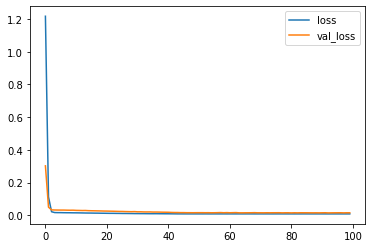

In [ ]:
# And then I can actually plot this out.

loss_df.plot()

# Typically in Neural Network training, you start of with a very high loss during your first couple of epoch runs.
# And then, as your weights and biases are starting to adjusting, you hopefully see kind of a steady but steep decline
# in your loss, or your error. And eventually, it will level off where you are not really doing any sort of improvements
# as you train more and more.

# I can directly compare the plot behavior of my "blue" training loss, versus my "orange" validation loss.
# We want a signal where it is decreasing, both the training loss and the validation loss.
# And then there should be no increase in in the validation set.
# Actually, what that means technically, we could have continued training.
# If the validation loss is also going down, that is an indicator that we could continue training without overfitting to our training data.

# If you saw this orange line begin to spike after some of these epochs, so it is starting to go up and up and up,
# that means that you are overtraining to the training data, because now you have a much larger loss on your validation data.

In [ ]:
model.evaluate(x_test, y_test, verbose=0)
model.evaluate(x_train, y_train, verbose=0)
test_predictions = model.predict(x_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

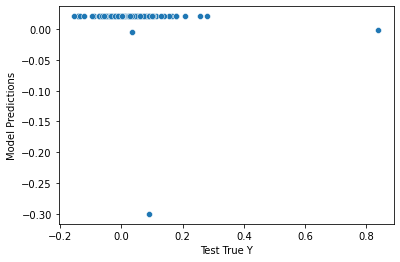

In [ ]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score


In [ ]:
# Mean absolute error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.07459902

In [ ]:
# Mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

0.015406957

In [ ]:
# Root mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

0.12412476342851927

In [ ]:
explained_variance_score(y_test, test_predictions)

-0.13896822929382324

In [ ]:
# Mean squared error
MSE_ANN = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# Mean absolute error
MAE_ANN = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# Root mean squared error
RMSE_ANN = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

In [ ]:
 r_squared_ANN = r2_score(y_test, test_predictions)
 print(r_squared_ANN)
 print(MSE_ANN)
 print(MAE_ANN)
 print(RMSE_ANN)

-0.14143162545313226
0.015406957
0.07459902
0.12412476342851927


In [ ]:
print(r_squared_FF3)
print(MSE_reg)
print(MAE_reg)
print(RMSE)

-0.010518567702941573
0.013639901535118007
0.07108187729727813
0.1167899890192563


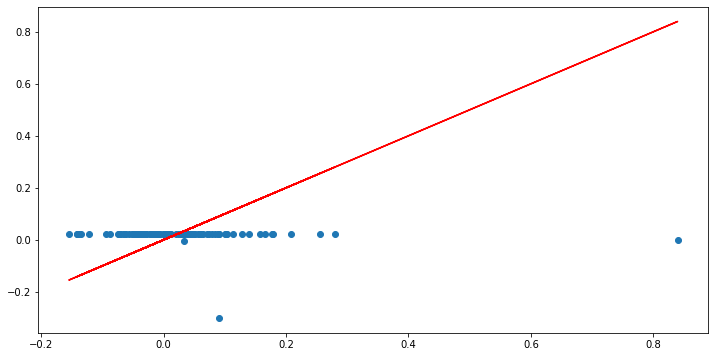

In [ ]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to andenr, or what problem we are trying to solve.

 **Second option: Early stopping
Used to prevent overfitting** 



In [ ]:
model_2 = Sequential()

model_2.add(Dense(3,activation='relu'))
model_2.add(Dense(1,activation='relu')) 
#model.add(Dense(56,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model_2.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=1, epochs=100, callbacks=[early_stop])

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0093 - val_loss: 0.0129
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0126
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0130
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0130
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0129
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0129
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0128
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0129
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0129
Epoch 10/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0091 - val_lo

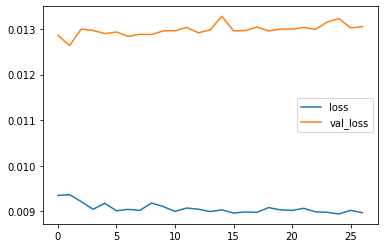

In [ ]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

In [ ]:
model_2.evaluate(x_test, y_test, verbose=0)
model_2.evaluate(x_train, y_train, verbose=0)
test_predictions = model_2.predict(x_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
 r_squared_ANN_2 = r2_score(y_test, test_predictions)
 print(r_squared_ANN_2)

0.032974212436074235


In [ ]:
MAE_ANN2 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5


print(MSE_ANN2)
print(MAE_ANN2)
print(RMSE_ANN2)

0.013052838
0.07076443
0.11424901716500294


In [ ]:
print(r_squared_FF3)
print(MSE_reg)
print(MAE_reg)
print(RMSE)

-0.010518567702941573
0.013639901535118007
0.07108187729727813
0.1167899890192563


**Option 3:** **Dropout**

In [ ]:
#@title
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Accuracy

In [ ]:
#@title
model_3 = Sequential()

model_3.add(Dense(3,activation='relu')) 
model_3.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

model_3.add(Dense(1,activation='relu')) 
model_3.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

# model.add(Dense(56,activation='relu')) 
# model.add(Dropout(0.3)) # half of (50%) these neurons will be turned of randomly during each batch


model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [ ]:
#@title
model_3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=1, epochs=100, callbacks=[early_stop])

Epoch 1/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0107 - val_loss: 0.0137
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0136
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0136
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0135
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0136
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0135
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0135
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0136
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0135
Epoch 10/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0091 - val_lo

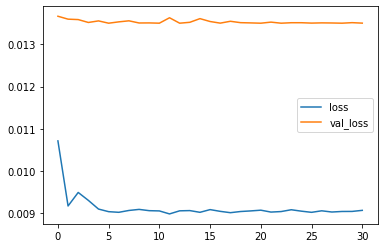

In [ ]:
#@title
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

In [ ]:
#@title
model_3.evaluate(x_test, y_test, verbose=0)
model_3.evaluate(x_train, y_train, verbose=0)
test_predictions = model_3.predict(x_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
r_squared_ANN_3 = r2_score(y_test, test_predictions)
print(r_squared_ANN_3)

-0.00012258065124104434


In [ ]:
MAE_ANN3 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
RMSE_ANN3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

r_squared_ANN3 = r2_score(y_test, test_predictions)
print(r_squared_ANN3)
print(MSE_ANN3)
print(MAE_ANN3)
print(RMSE_ANN3)

-0.00012258065124104434
0.013499575
0.07130588
0.11618767032590287


In [ ]:
print(r_squared_FF3)
print(MSE_reg)
print(MAE_reg)
print(RMSE)

-0.010518567702941573
0.013639901535118007
0.07108187729727813
0.1167899890192563
